In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!nvidia-smi

Thu May 11 09:18:23 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, Xception, InceptionV3, ResNet50, DenseNet121
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Define data directories
train_dir = "/content/drive/MyDrive/Uncovering The Hidden Treasures Of The Mushroom Kingdom: A Classification AnalysisUntitled folder/Dataset/train"
test_dir = "/content/drive/MyDrive/Uncovering The Hidden Treasures Of The Mushroom Kingdom: A Classification AnalysisUntitled folder/Dataset/test"

# Define image size
img_size = (224, 224)

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    fill_mode="nearest"
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load and preprocess training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    class_mode="categorical",
    batch_size=100
)

# Load and preprocess test data
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    class_mode="categorical",
    batch_size=100
)

base_model = InceptionV3(weights="imagenet", include_top=False, input_shape=(img_size[0], img_size[1], 3))

# Build transfer learning model
model5 = Sequential()
model5.add(base_model)
model5.add(GlobalAveragePooling2D())
model5.add(Dense(100, activation="relu"))
model5.add(BatchNormalization())
model5.add(Dropout(0.5))
model5.add(Dense(100, activation="relu"))
model5.add(BatchNormalization())
model5.add(Dropout(0.5))
model5.add(Dense(3, activation="softmax"))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
optimizer = Adam(learning_rate=0.001)
model5.compile(
    optimizer=optimizer,
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# Early stopping
early_stop = EarlyStopping(
    monitor="val_loss",
    patience=5
)


# Training
history100 = model5.fit(train_data, epochs=50, validation_data=test_data, callbacks=[early_stop])

# Evaluate the model
loss, accuracy = model5.evaluate(test_data)
accuracy_percentage = accuracy * 100
print("Test loss:", loss)
print("Test accuracy:", accuracy_percentage)

Found 911 images belonging to 3 classes.
Found 292 images belonging to 3 classes.
Epoch 1/50
10/10 [==============================] - 409s 44s/step - loss: 1.4139 - accuracy: 0.4577 - val_loss: 1.2089 - val_accuracy: 0.2808
Epoch 2/50
10/10 [==============================] - 24s 2s/step - loss: 0.9628 - accuracy: 0.6081 - val_loss: 1.3015 - val_accuracy: 0.3219
Epoch 3/50
10/10 [==============================] - 25s 3s/step - loss: 0.8397 - accuracy: 0.6773 - val_loss: 1.2984 - val_accuracy: 0.3938
Epoch 4/50
10/10 [==============================] - 23s 2s/step - loss: 0.7214 - accuracy: 0.7080 - val_loss: 0.8995 - val_accuracy: 0.5445
Epoch 5/50
10/10 [==============================] - 24s 2s/step - loss: 0.6653 - accuracy: 0.7333 - val_loss: 0.7398 - val_accuracy: 0.6096
Epoch 6/50
10/10 [==============================] - 24s 2s/step - loss: 0.6067 - accuracy: 0.7673 - val_loss: 0.6160 - val_accuracy: 0.7055
Epoch 7/50
10/10 [==============================] - 24s 2s/step - loss: 0.61

1/1 [==============================] - 0s 42ms/step
The Mushroom image classification is: Russula


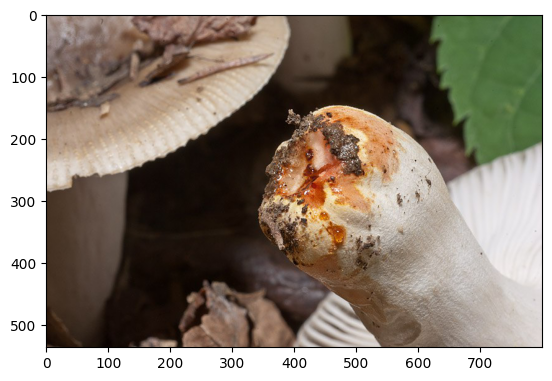

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image

def predict(input_model):
  given_image = plt.imread(input_model)
  plt.imshow(given_image)
  inputImage = image.load_img(input_model, target_size=(224, 224))  # Adjust the target_size to (224, 224)
  inputImage = image.img_to_array(inputImage)
  inputImage = np.expand_dims(inputImage, axis=0)
  inputImage = inputImage / 255.0
  prediction = model5.predict(inputImage)
  predicted_class_index = np.argmax(prediction)
  class_names = list(train_data.class_indices.keys())
  predicted_class = class_names[predicted_class_index]
  print("The Mushroom image classification is:", predicted_class)

predict("/content/drive/MyDrive/Uncovering The Hidden Treasures Of The Mushroom Kingdom: A Classification AnalysisUntitled folder/Dataset/train/Russula/259_41A6FKNEWlk.jpg")


In [ ]:
model5.save("Mushroom Classification Model 88.h5")

In [ ]:
model5.save("/content/drive/MyDrive/Uncovering The Hidden Treasures Of The Mushroom Kingdom: A Classification AnalysisUntitled folder/Mushroom Classification Model 88.h5")

In [ ]:
print(list(train_data.class_indices.keys()))

['Boletus', 'Lactarius', 'Russula']


1/1 [==============================] - 0s 27ms/step
The Mushroom image classification is: Boletus


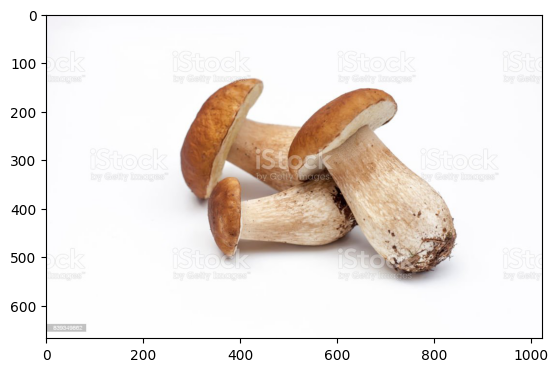

In [ ]:
predict("/content/istockphoto-839349862-1024x1024.jpg")